In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
maxwellboltzmann = {"m": 18, "n": -3, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 0.1}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

# # Adding perturbation after the object is created uses the found axis as center point
pyoproblem.add_perturbation(maxwellboltzmann)

### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

# Choose the tangles to work with
manifold.choose(0, 0)

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12
0 - dr : 9.776471937205409e-12

Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.36712439 0.29354433] - dtheta : 0.10090020227304075
0 - [StepR, StepZ]: [-0.0234081  -0.02046676]
1 - RZ : [ 6.19220081 -4.49028532] - rhotheta : [ 3.80308568 -1.62917605]
1 - [DeltaR, DeltaZ] : [-0.16091763 -0.17273987] - dtheta : 0.03776565443633717
1 - [StepR, StepZ]: [0.00554841 0.00261813]
2 - RZ : [ 6.19774921 -4.4876672 ] - rhotheta : [ 3.8001521  -1.62775869]
2 - [DeltaR, DeltaZ] : [-0.01702951 -0.02887643] - dtheta : 0.004009927099813071
2 - [StepR, StepZ]: [ 0.00592305 -0.00817383]
3 - RZ : [ 6.20367226 -4.49584103] - rhotheta : [ 3.80798081 -1.62608358]
3 - [DeltaR, DeltaZ] : [0.00038633 0.00017684] - dtheta : 9.873634145995958e-05
3 - [StepR, StepZ]: [ 5.61222934e-05 -1.29116512e-04]
4 - RZ : [ 6.

In [ ]:
fig = pickle.load(open("manifold_05070828.pkl", "rb"))
ax = fig.gca()

In [13]:
manifold.find_clinics(n_points = 6, jac=True, options={'factor': 1})

2024-05-12 23:16:52 [info     ] Search for minimum of the linear error succeeded, epsilon = 2.05960e-07
2024-05-12 23:16:52 [info     ] Search for minimum of the linear error succeeded, epsilon = 3.50421e-07
2024-05-12 23:16:52 [debug    ] Guess - 2.841796647265769e-06, 4.835040517664605e-06
2024-05-12 23:16:52 [debug    ] Bounds - ((2.0595966951673615e-07, 5.8895529640482745e-06), (3.5042123103502937e-07, 1.0020502266364239e-05))
2024-05-12 23:16:52 [debug    ] n_s, n_u - 7, 6
2024-05-12 23:16:54 [debug    ] Inside : (2.841796647265769e-06, 4.8350405176646055e-06) - (array([8.59733256, 0.49243182]), array([5.23709979, 1.93248555]), array([ 3.36023277, -1.44005373]))
2024-05-12 23:16:56 [debug    ] Inside : (1.649265480087825e-06, 4.204012466606406e-05) - (array([7.68756967, 1.73189035]), array([3.94751617, 0.12524352]), array([3.74005351, 1.60664683]))
2024-05-12 23:16:58 [debug    ] Inside : (1.0577708594552841e-06, 1.2822813765124203e-05) - (array([7.53838718, 1.77574906]), array([4

ValueError: Homoclinic search not successful.

In [4]:
manifold.clinics

[(2.3953165241622165e-06,
  3.2638914118002564e-07,
  2.3953165241622165e-06,
  array([5.98049852, 2.09218639]),
  array([5.98049852, 2.09218639])),
 (7.324795684688517e-06,
  3.0521281682826296e-06,
  7.324795684856539e-06,
  array([8.61747429, 0.45603438]),
  array([8.61747429, 0.45603438])),
 (1.4670904230780487e-05,
  9.333289595994316e-06,
  2.395316517652657e-06,
  array([ 8.75949258, -1.18401253]),
  array([ 8.75949258, -1.18401253])),
 (1.6194596359157187e-05,
  1.8675124464815257e-06,
  1.6194596359055093e-05,
  array([7.99820035, 1.45763786]),
  array([7.99820035, 1.45763786])),
 (2.23988310997405e-05,
  9.980894370361278e-07,
  2.2398831099813483e-05,
  array([7.5278074 , 1.77116025]),
  array([7.5278074 , 1.77116025])),
 (4.9521636776959994e-05,
  6.107028439089443e-07,
  4.952163677674493e-05,
  array([6.51739782, 2.15764041]),
  array([6.51739782, 2.15764041]))]

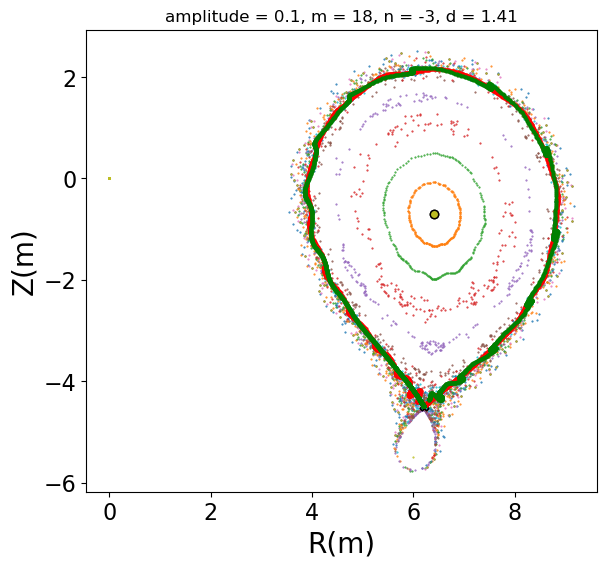

In [9]:
fig = pickle.load(open("manifold_05070825.pkl", "rb"))
ax = fig.gca()

In [10]:
marker = ["+", "o", "s", "p", "P", "*", "X", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_s, n_u = 8, 8
    
    hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)
    ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="blue", zorder=10)

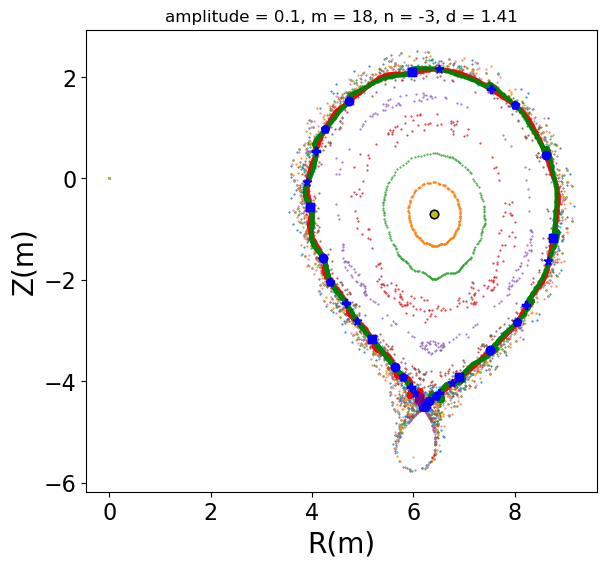

In [11]:
# ax.set_xlim(6, 8)
# ax.set_ylim(-5, -3.5)
# ax.set_xlim(6, 9)
# ax.set_ylim(-5, -1)
fig

In [5]:
manifold.resonance_area()

2024-05-12 22:28:07 [info     ] Forward integration goes beyond stable saddle point.
2024-05-12 22:28:07 [debug    ] rfp_s: [ 6.2037284  -4.49597016], rze_end: [ 6.20372808 -4.49597044], rze_forward: [ 6.20372822 -4.49596989]
2024-05-12 22:28:08 [info     ] Backward integration goes beyond unstable saddle point.
2024-05-12 22:28:08 [debug    ] rfp_u: [ 6.2037284  -4.49597016], rze_end: [ 6.20373512 -4.49598193], rze_backward: [ 6.20372869 -4.49597052]
2024-05-12 22:28:08 [info     ] Potential integration completed for homo/hetero-clinic point of order : 2.395e-06
2024-05-12 22:28:09 [info     ] Forward integration goes beyond stable saddle point.
2024-05-12 22:28:09 [debug    ] rfp_s: [ 6.2037284  -4.49597016], rze_end: [ 6.20372144 -4.49597647], rze_forward: [ 6.2037281  -4.49597029]
2024-05-12 22:28:09 [info     ] Backward integration goes beyond unstable saddle point.
2024-05-12 22:28:09 [debug    ] rfp_u: [ 6.2037284  -4.49597016], rze_end: [ 6.20372757 -4.4959687 ], rze_backward: 

(array([-9.68309245e-06, -1.28789017e-05, -1.54264864e-01,  1.54290183e-01,
        -1.54334424e-01,  1.54326164e-01]),
 [[array([ -3.89276191,  -9.29176936, -12.44411757,   9.14849593,
           12.29620723,  12.42152187,  12.42592593]),
   array([  7.58529263,  23.62645387,   7.44918145, -11.05569693,
          -12.37617677, -12.42433758, -12.42603214])],
  [array([-17.2141283 ,   3.22034328, -17.06882324,  -3.66070474,
           11.25896094,  12.3834736 ,  12.42459302,  12.42604135]),
   array([  9.65242793,  19.50826188,  -8.5551723 , -12.27394071,
          -12.42074079, -12.42589724])],
  [array([ -7.58529261,  -3.89276192,  -9.2917693 , -12.44411762,
            9.14849591,  12.29620724,  12.42152196,  12.4259287 ]),
   array([ 23.62645389,   7.44918143, -11.05569693, -12.37617676,
          -12.42433704, -12.42601649])],
  [array([-17.67514546,   5.06298943, -19.18147628,   0.16743043,
           11.6996508 ,  12.39999619,  12.42517269,  12.42607393]),
   array([  2.63169607,

In [6]:
areas = manifold.areas
areas

array([-9.68309245e-06, -1.28789017e-05, -1.54264864e-01,  1.54290183e-01,
       -1.54334424e-01,  1.54326164e-01])

In [ ]:
areas[0]*2

In [7]:
areas[areas > 0].sum()

0.3086163473269927

In [8]:
areas[areas < 0].sum()

-0.30862184964935935